##STUDENT PERFORMANCE ANALYSIS


##General objectives
To analyze key factors influencing student academic performance and develop an interactive machine learning-based application capable of predicting student performance scores.
##Specific objectives
The objectives of this research project are:
1. To prepare and process educational data for model training.
2. To build a predictive model for estimating performance scores.
3. To create a user-friendly Streamlit interface for input and prediction.
4. To evaluate model accuracy using performance metrics.
5. To offer insights for improving academic outcomes.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
df.duplicated().sum()

np.int64(127)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


##The code calculates the correlation matrix for numerical features in the dataset and visualizes it as a heatmap using sns.heatmap(). The heatmap is annotated with correlation values and uses the "coolwarm" color map to display relationships between features.

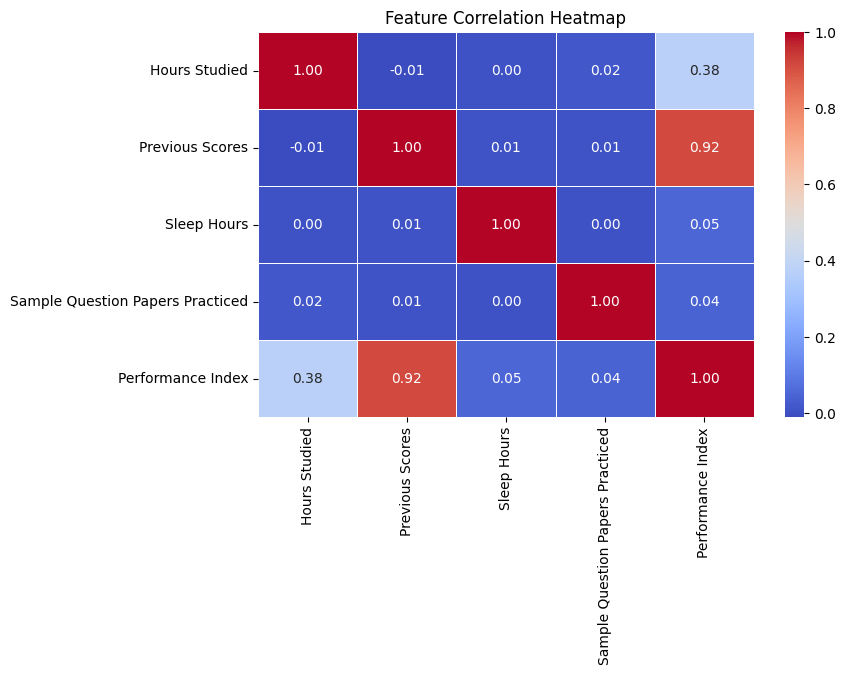

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,5))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

##The code sets the Seaborn plot style to "whitegrid", adding a white background with gridlines for cleaner visualization.

In [ ]:
# Set style
sns.set(style="whitegrid")

##The code selects the appropriate score column and plots a histogram with a KDE curve to visualize the distribution of student scores. It customizes the plot with a title and axis labels before displaying it.

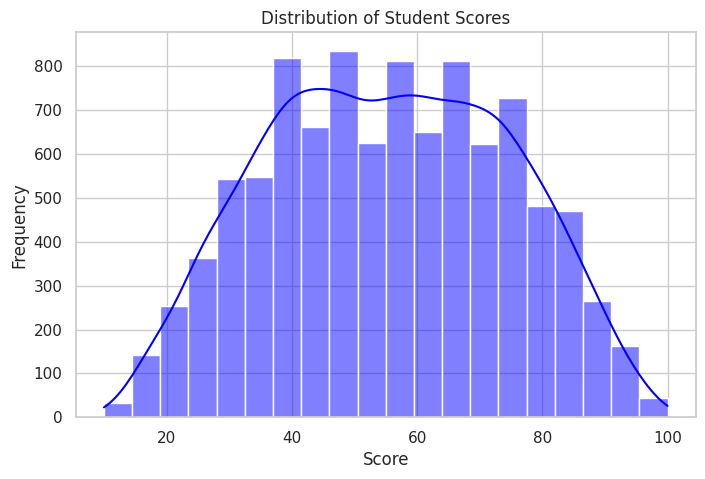

In [ ]:
# Visualizing the distribution of student scores
plt.figure(figsize=(8,5))
# Check if 'Score' is in the columns, if not, try 'Scores', otherwise try 'Performance Index'
score_column = 'Score' if 'Score' in df.columns else 'Scores' if 'Scores' in df.columns else 'Performance Index'
sns.histplot(df[score_column], bins=20, kde=True, color='blue')
plt.title("Distribution of Student Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

##The code creates a scatter plot to show the relationship between "Hours Studied" and the selected score column, colored by "Extracurricular Activities". It customizes the plot with a title and axis labels before displaying it.

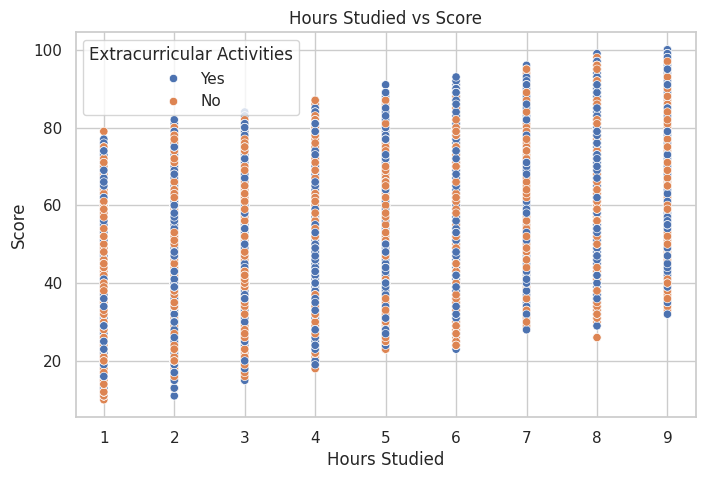

In [ ]:
# Scatter plot: Hours Studied vs Score
plt.figure(figsize=(8,5))
# Assuming the actual column names are 'Hours Studied' and 'Extracurricular Activities'
# Update these if your column names are different.
# Use the score_column variable defined previously
sns.scatterplot(x=df['Hours Studied'], y=df[score_column], hue=df['Extracurricular Activities'])
plt.title("Hours Studied vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

##The code creates a histogram to show the distribution of "Hours Studied" with 20 bins and a KDE curve. It customizes the plot with a title and axis labels before displaying it.

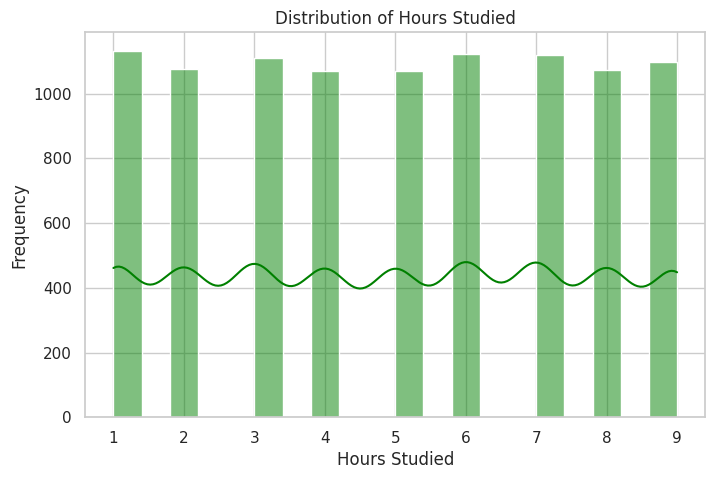

In [ ]:
# Histogram: Hours Studied Distribution
plt.figure(figsize=(8,5))
# Use 'Hours Studied' instead of 'Hours_Studied'
sns.histplot(df['Hours Studied'], bins=20, kde=True, color='green')
plt.title("Distribution of Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Frequency")
plt.show()

##The code groups the dataset by "Extracurricular Activities" and calculates the average score for each activity using score_column. It then plots a bar chart with the calculated averages, assigning specific colors to the bars. Finally, it customizes the chart with a title, axis labels, and horizontal x-axis tick labels.

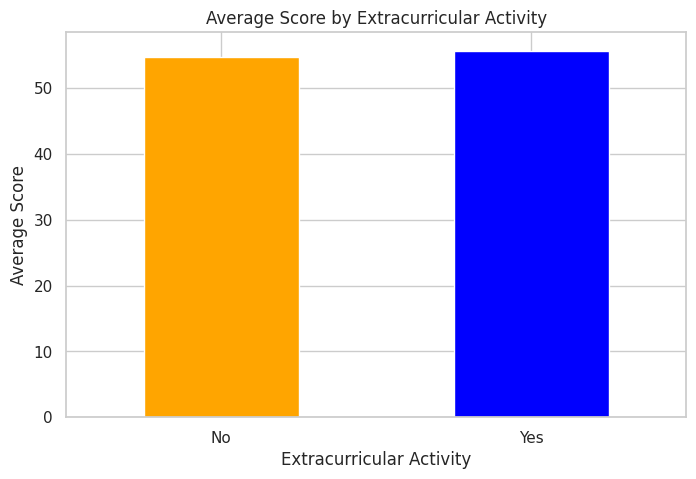

In [ ]:
#Bar Chart: Average Score by Extracurricular Activity
plt.figure(figsize=(8,5))
# Use 'Extracurricular Activities' instead of 'Extracurricular' for the groupby
# Use the score_column variable which dynamically finds the score column
df.groupby("Extracurricular Activities")[score_column].mean().plot(kind="bar", color=["orange", "blue"])
plt.title("Average Score by Extracurricular Activity")
plt.xlabel("Extracurricular Activity")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

##The code creates a regression plot to show the relationship between "Hours Studied" and the score, with the score column dynamically selected. It plots blue scatter points and a red regression trend line. The chart is customized with labels and a title before being displayed.

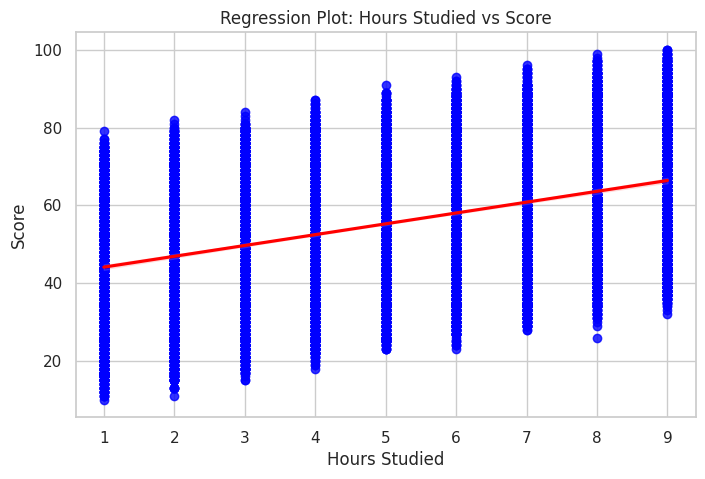

In [ ]:
#Regression Plot – Hours Studied vs Score (With Trend Line)
plt.figure(figsize=(8,5))
# Replace 'Hours_Studied' with 'Hours Studied' to match the actual column name
# Use score_column for the y-axis for dynamic score column selection
sns.regplot(x=df["Hours Studied"], y=df[score_column], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot: Hours Studied vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

##The code categorizes students into score ranges (e.g., "Failing", "Good") based on their "Performance Index". It then creates a bar chart to show the number of students in each score category with different colors. Finally, the chart is customized with a title and axis labels before being displayed.

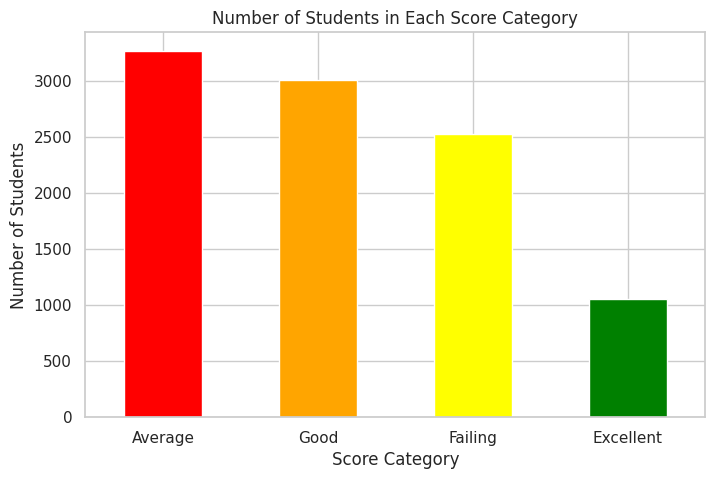

In [ ]:
#Stacked Bar Chart – Comparing Students in Different Score Ranges
score_bins = [0, 40, 60, 80, 100]
score_labels = ["Failing", "Average", "Good", "Excellent"]
# Replace 'Score' with 'Performance Index' as the DataFrame likely has a column named 'Performance Index' instead of 'Score'
df["Score Category"] = pd.cut(df["Performance Index"], bins=score_bins, labels=score_labels)

plt.figure(figsize=(8,5))
df["Score Category"].value_counts().plot(kind="bar", color=["red", "orange", "yellow", "green"])
plt.title("Number of Students in Each Score Category")
plt.xlabel("Score Category")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.show()

##The code categorizes students into score ranges ("Failing", "Good") based on their "Performance Index". It then creates a pie chart showing the percentage of students in each score category with color coding. The chart is customized to display percentages and remove the y-axis label before being shown.

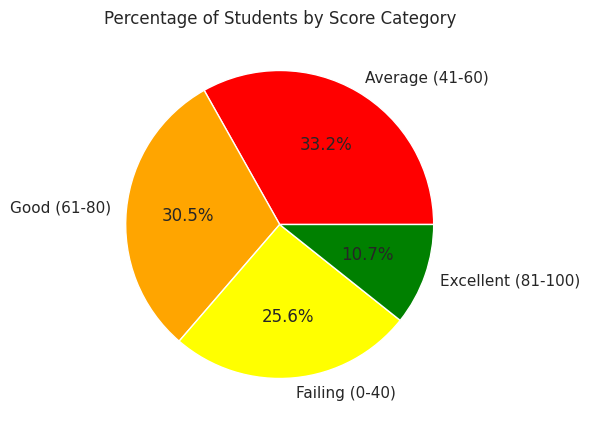

In [ ]:
#Pie Chart: Percentage of Students in Each Score Range
score_bins = [0, 40, 60, 80, 100]
score_labels = ["Failing (0-40)", "Average (41-60)", "Good (61-80)", "Excellent (81-100)"]
# Replace 'Score' with 'Performance Index', as that's the likely score column
df["Score Category"] = pd.cut(df["Performance Index"], bins=score_bins, labels=score_labels)

plt.figure(figsize=(8,5))
df["Score Category"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["red", "orange", "yellow", "green"])
plt.title("Percentage of Students by Score Category")
plt.ylabel("")  # Remove the default ylabel
plt.show()

##The code creates a boxplot to show the distribution of "Performance Index" scores across different "Extracurricular Activities". It uses a "coolwarm" color palette for the plot. The chart is customized with a title and axis labels before being displayed.

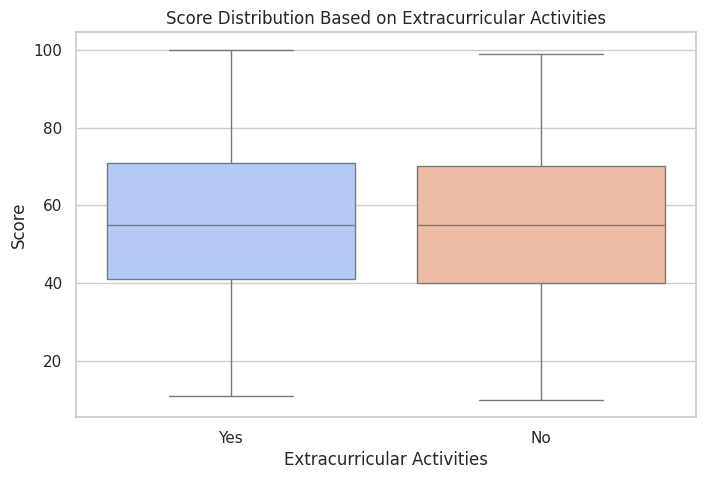

In [ ]:
plt.figure(figsize=(8,5))
# Replace 'Extracurricular' with 'Extracurricular Activities'
# Replace 'Score' with 'Performance Index' or whichever column you use for score
sns.boxplot(x=df["Extracurricular Activities"], y=df["Performance Index"], palette="coolwarm")
plt.title("Score Distribution Based on Extracurricular Activities")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Score")
plt.show()

##The code generates a violin plot to show the distribution of "Performance Index" scores across different "Extracurricular Activities", combining aspects of a boxplot and a density plot. The palette="muted" parameter gives the plot a softer color scheme. The plot is then customized with a title and axis labels to make it more informative before being displayed.

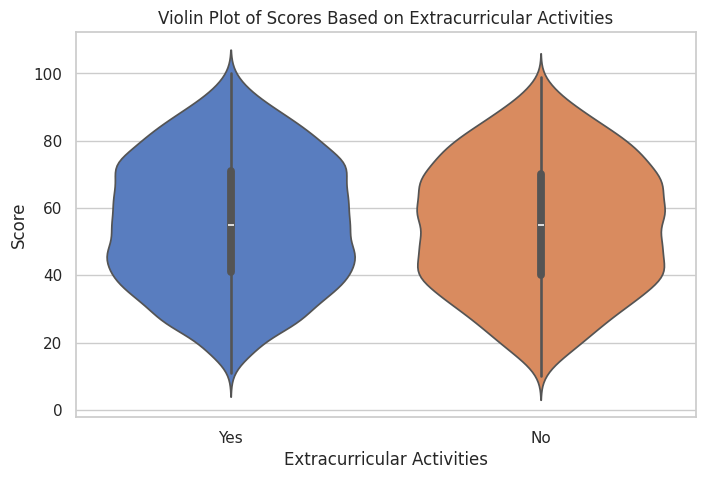

In [ ]:
#Violin Plot: Hours Studied vs Score
plt.figure(figsize=(8,5))
# Replace 'Extracurricular' with 'Extracurricular Activities'
# Replace 'Score' with 'Performance Index' or whichever column you use for score
sns.violinplot(x=df["Extracurricular Activities"], y=df["Performance Index"], palette="muted")
plt.title("Violin Plot of Scores Based on Extracurricular Activities")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Score")
plt.show()

##The code uses LabelEncoder() to convert categorical values like "Yes" and "No" in the "Extracurricular Activities" column into numerical values (1 and 0). The fit_transform() method applies this encoding. The transformed values are then stored back in the original column of the DataFrame.

In [ ]:
# Encode categorical variable (Yes -> 1, No -> 0)
label_encoder = LabelEncoder()
df["Extracurricular Activities"] = label_encoder.fit_transform(df["Extracurricular Activities"])

##The code uses StandardScaler() to normalize the selected numerical features, transforming them to have a mean of 0 and a standard deviation of 1. The scaled values replace the original values in the specified columns of the DataFrame.

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

##The code splits the data into 80% for training and 20% for testing using train_test_split(). The random_state=42 ensures the split is reproducible.

In [ ]:
# Split data into training (80%) and testing (20%)
# Define X and y before using them in train_test_split
X = df[["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Extracurricular Activities"]]  # Features
y = df["Performance Index"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##The code initializes a RandomForestRegressor model with 100 decision trees and a fixed random state for reproducibility. It then trains the model using the training data (X_train, y_train).

In [ ]:
# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##The code makes predictions on the test set using the trained model and calculates performance metrics: Mean Absolute Error (MAE), R-squared (R²), and Root Mean Squared Error (RMSE). These metrics evaluate the model's prediction accuracy and error magnitude.

In [ ]:
# Evaluate model performance
# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_rf_pred))

##The code checks if the R² score is valid (not NaN). If valid, it formats the accuracy message as a percentage; otherwise, it sets an error message indicating the R² score calculation failed.

In [ ]:

# Ensure R² Score is valid before printing
if np.isnan(r2_rf):
    accuracy_msg = "R² Score calculation failed. Got NaN."
else:
    accuracy_msg = f"Model Accuracy: {r2_rf * 100:.2f}%"

##The code prints the evaluation metrics: MAE, R² score, and RMSE, with appropriate formatting. It also prints the accuracy message, either showing the R² score or an error message if the calculation failed.

In [ ]:
# Print results
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(accuracy_msg)

Mean Absolute Error (MAE): 1.90
R² Score: 0.9848
Root Mean Squared Error (RMSE): 2.38
Model Accuracy: 98.48%


##The code saves the trained Random Forest model to a file ("student_performance_model.pkl") for later use.

In [ ]:

# Save the trained model to a file
joblib.dump(rf_model, "student_performance_model.pkl")

['student_performance_model.pkl']

In [ ]:
print("Model saved successfully as 'student_performance_model.pkl'")

Model saved successfully as 'student_performance_model.pkl'


In [ ]:

!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


##Creating a Streamlit app where users can input data about hours studied, previous scores, sleep hours, sample papers, and extracurricular activities. It loads a pre-trained Random Forest model and uses the inputs to predict the student's performance score. When the "Analyze" button is clicked, the app displays the predicted score.

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load the saved Random Forest model
model = joblib.load("student_performance_model.pkl")

st.set_page_config(page_title="Student Performance App", layout="centered")
st.title("🎓 Student Performance Analysis")

# Inputs
hours_studied = st.slider("Hours Studied", 0.0, 24.0, 2.0)
previous_scores = st.slider("Previous Scores (%)", 0, 100, 50)
sleep_hours = st.slider("Sleep Hours", 0.0, 12.0, 6.0)
sample_papers = st.slider("Sample Papers Practiced", 0, 50, 10)
extra = st.radio("Extracurricular Activities", ["Yes", "No"])
extra_encoded = 1 if extra == "Yes" else 0

if st.button("Analyze"):
    data = np.array([[hours_studied, previous_scores, sleep_hours, sample_papers, extra_encoded]])
    result = model.predict(data)[0]
    st.success(f"📈 Predicted Performance Score: {result:.2f}")


Writing app.py


##The code allows you to upload files from your local machine to Google Colab for further use.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Performance (3).ipynb to Performance (3).ipynb


##The code authenticates ngrok, creates a public URL for the Streamlit app running on port 8501, and ensures any previous Streamlit instances are stopped. It then runs the app and prints the public URL for accessing the app.

In [ ]:
!ngrok authtoken 2vl8xQXPu1pGsk6VPCb17CbSAdP_3pNdjReMEbzMurzudF5SD
from pyngrok import ngrok
import os
import time
sleep = time.sleep(5)

# Kill any previous tunnels
!pkill streamlit

# Create a tunnel to the default Streamlit port (8501)
public_url = ngrok.connect(addr=8501)
print("🌐 Streamlit app is live at:", public_url)

# Run the Streamlit app
!streamlit run app.py &
sleep.time(5)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐 Streamlit app is live at: NgrokTunnel: "https://3dd9-104-196-5-119.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.5.119:8501



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/